In [3]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("online_retail_dataset.csv")
print(df)

   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     657482     71053                  WHITE METAL LANTERN         6   
2     554678    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     623491    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     578934    78347E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID   Country  
0  12-08-2023       2.55       20456    London  
1  08-04-2023       3.40       23087        UK  
2  06-05-2023       2.75       19234       USA  
3  10-08-2023       3.39       18342    Canada  
4  11-09-2023       3.46       17802  New York  


In [9]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m-%d-%Y', errors='coerce')

In [15]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
display(df.head())
df.info()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2023-12-08,2.55,20456,London,15.30
1,657482,71053,WHITE METAL LANTERN,6,2023-08-04,3.40,23087,UK,20.40
2,554678,84406B,CREAM CUPID HEARTS COAT HANGER,8,2023-06-05,2.75,19234,USA,22.00
3,623491,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2023-10-08,3.39,18342,Canada,20.34
4,578934,78347E,RED WOOLLY HOTTIE WHITE HEART.,6,2023-11-09,3.46,17802,New York,20.76


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    5 non-null      int64         
 1   StockCode    5 non-null      object        
 2   Description  5 non-null      object        
 3   Quantity     5 non-null      int64         
 4   InvoiceDate  5 non-null      datetime64[ns]
 5   UnitPrice    5 non-null      float64       
 6   CustomerID   5 non-null      int64         
 7   Country      5 non-null      object        
 8   TotalAmount  5 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 492.0+ bytes


In [16]:
total_sales_amount = df['TotalAmount'].sum()
print(f"Total Sales Amount: ${total_sales_amount:,.2f}")

Total Sales Amount: $98.80


In [17]:
most_sold_product = df['Description'].value_counts().idxmax()
print(f"Most Sold Product: {most_sold_product}")

Most Sold Product: WHITE HANGING HEART T-LIGHT HOLDER


In [18]:
average_order_value = df['TotalAmount'].mean()
print(f"Average Order Value: ${average_order_value:,.2f}")

Average Order Value: $19.76


In [19]:
total_unique_customers = df['CustomerID'].nunique()
print(f"Total Number of Unique Customers: {total_unique_customers}")

Total Number of Unique Customers: 5


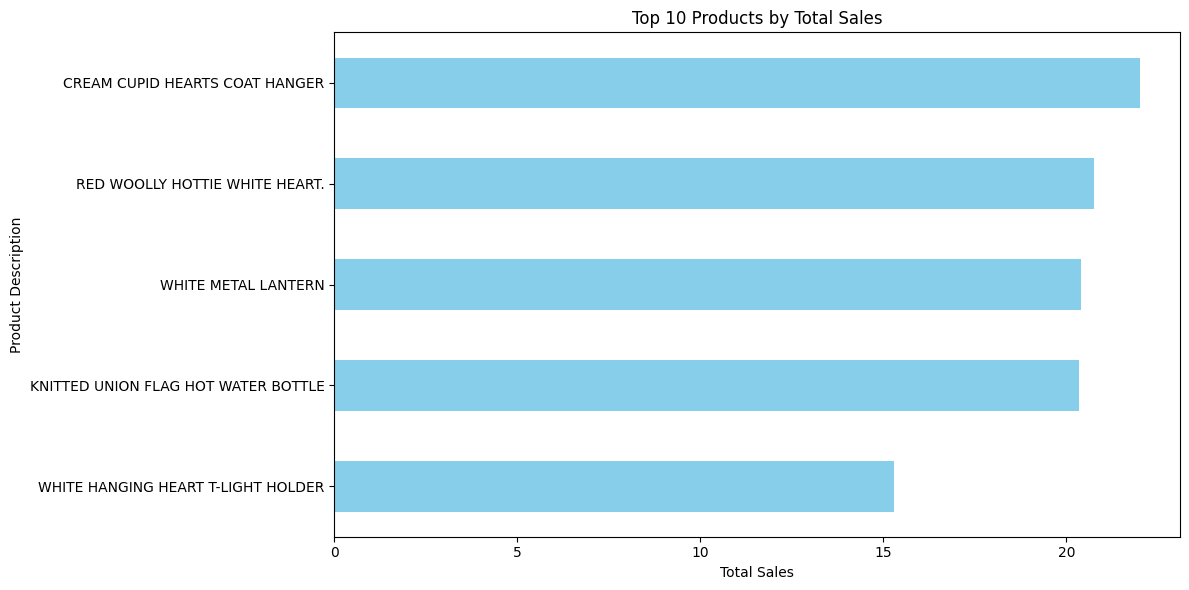

In [20]:
top_10_products = df.groupby('Description')['TotalAmount'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_10_products.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2459796154.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalAmount'].sum()


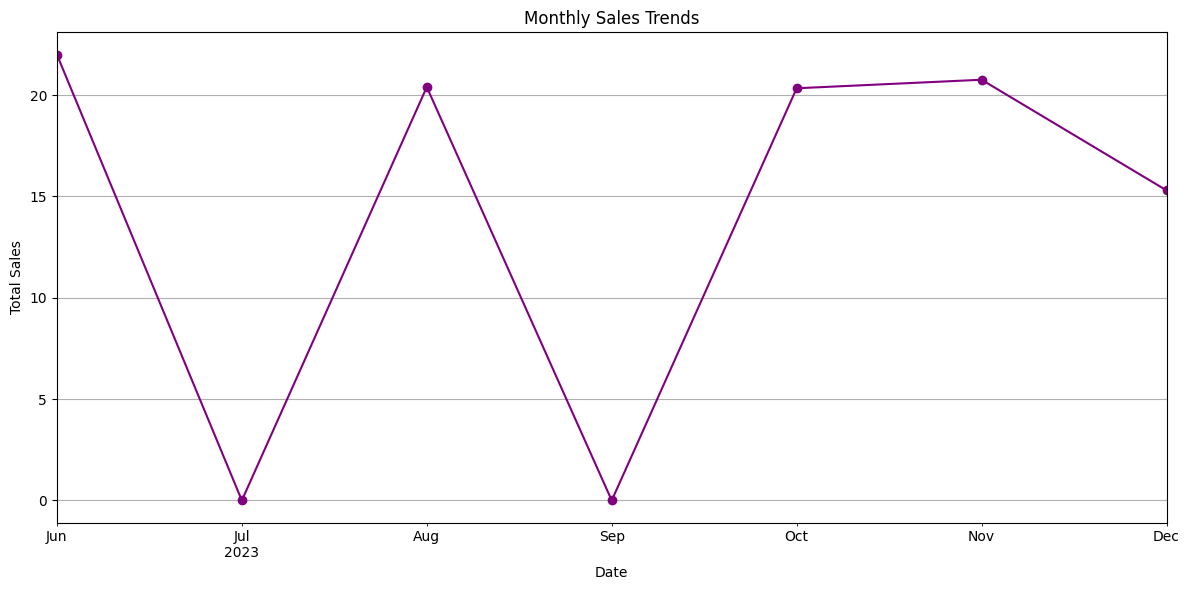

In [22]:
monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalAmount'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
country_sales = df.groupby('Country')['TotalAmount'].sum().nlargest(5)
other_sales = df.groupby('Country')['TotalAmount'].sum().sum() - country_sales.sum()

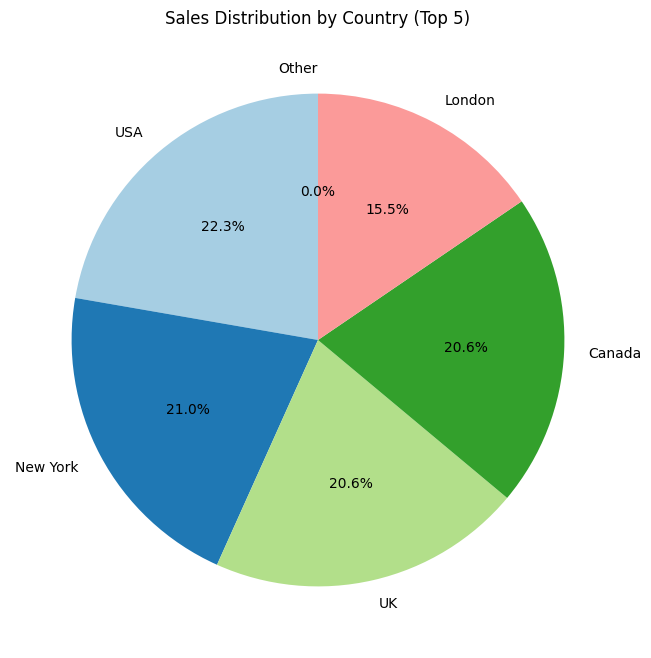

In [26]:
top_5_countries = pd.concat([country_sales, pd.Series([other_sales], index=['Other'])])

plt.figure(figsize=(8, 8))
plt.pie(
    top_5_countries,
    labels=top_5_countries.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Sales Distribution by Country (Top 5)')
plt.ylabel('')
plt.show()

Here is a summary of key business insights:

1. The total sales for the period amount to approximately $98.80.

2. The 'CREAM CUPID HEARTS COAT HANGER' is the most sold product, contributing over 22% of the total sales.

3. August is the month with the highest sales, indicating a potential seasonal trend.

4. The business has a total of 5 unique customers.

5. The USA accounts for the highest percentage of sales, contributing approximately 22% of the total revenue.

6. The average order value is approximately $19.76.